## import

In [1]:
import os
import math
import datetime
import json
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import cv2
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
%matplotlib inline

# 追記

## main

In [2]:
# 読み込み
org_img = cv2.imread("./source/book.jpg")
img_height = org_img.shape[0]
img_width = org_img.shape[1]
img_center = (int(img_width/2), int(img_height/2))

#回転処理
# org_img = cv2.rotate(org_img, cv2.ROTATE_90_CLOCKWISE)


#回転処理
# trans = cv2.getRotationMatrix2D(img_center, 90 , 1) # angle 90 scale 1
# org_img = cv2.warpAffine(org_img, trans, (img_width,img_height))

In [3]:
# 白黒
gray_img = cv2.cvtColor(org_img , cv2.COLOR_BGR2GRAY)
# 2値化
_, gray_img = cv2.threshold(gray_img, 125, 255, cv2.THRESH_BINARY)
#ケニー処理
c_img = cv2.Canny(gray_img, 10, 255)

In [4]:
# 輪郭認識
contours, hierarchy = cv2.findContours(c_img,  cv2.RETR_LIST,  cv2.CHAIN_APPROX_SIMPLE)

In [5]:
target_areas = []
edg_img = org_img.copy()
for idx, hier in enumerate(contours):
    tmp_area = cv2.contourArea(contours[idx])
    
    x,y,w,h = cv2.boundingRect(contours[idx])
    if w > img_width*0.5 and h > img_height*0.5:
        print(tmp_area)
        print("x",x,"y",y,"w",w,"h",h)
        target_areas.append({"x":x, "y":y, "w":w, "h":h})
    else:
        continue
    
    for point in  contours[idx]:
        cv2.circle(edg_img, (point[0][0] , point[0][1]  ), 15, (0, 255, 255), thickness= 20  ) 

8.0
x 25 y 41 w 743 h 522


## 矩形

In [6]:
x = target_areas[0]["x"]
y = target_areas[0]["y"]
w = target_areas[0]["w"]
h = target_areas[0]["h"]

In [7]:
# x,y,w,h = cv2.boundingRect(cnt)
org_rct_img = cv2.rectangle(edg_img,(x,y),(x+w,y+h),(0,255,0),2)
rct_img = org_img[y : y+h, x : x+w]


In [8]:
rct_rtt_img = cv2.rotate(rct_img, cv2.ROTATE_90_CLOCKWISE)

## 表示エリア

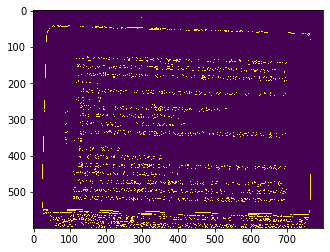

In [9]:
plt.imshow(c_img)
plt.show()

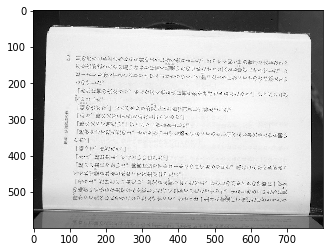

In [10]:
im4p = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
plt.imshow(im4p)
plt.show()

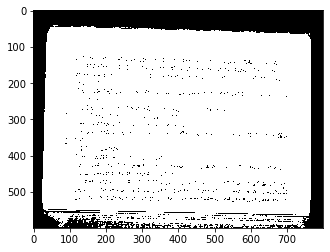

In [11]:
#  2値化の結果
im4p = cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB)
plt.imshow(im4p)
plt.show()

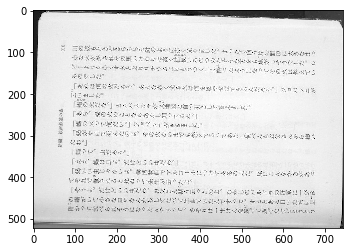

In [12]:
#  矩形画像
im4p = cv2.cvtColor(rct_img, cv2.COLOR_BGR2RGB)
plt.imshow(im4p)
plt.show()

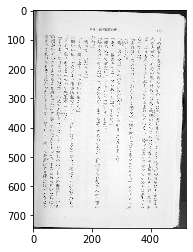

In [13]:
# 矩形回転
im4p = cv2.cvtColor(rct_rtt_img, cv2.COLOR_BGR2RGB)
plt.imshow(im4p)
plt.show()


In [14]:
contours

[array([[[635, 599]],
 
        [[636, 599]]], dtype=int32),
 array([[[606, 599]]], dtype=int32),
 array([[[604, 599]]], dtype=int32),
 array([[[571, 599]]], dtype=int32),
 array([[[566, 599]]], dtype=int32),
 array([[[562, 599]],
 
        [[563, 599]]], dtype=int32),
 array([[[556, 599]],
 
        [[557, 599]]], dtype=int32),
 array([[[529, 599]],
 
        [[530, 599]]], dtype=int32),
 array([[[484, 599]],
 
        [[485, 599]]], dtype=int32),
 array([[[433, 599]]], dtype=int32),
 array([[[416, 599]]], dtype=int32),
 array([[[410, 599]],
 
        [[411, 599]]], dtype=int32),
 array([[[385, 599]],
 
        [[386, 599]]], dtype=int32),
 array([[[370, 599]]], dtype=int32),
 array([[[366, 599]]], dtype=int32),
 array([[[345, 599]],
 
        [[346, 599]]], dtype=int32),
 array([[[296, 599]]], dtype=int32),
 array([[[293, 599]]], dtype=int32),
 array([[[269, 599]],
 
        [[271, 599]]], dtype=int32),
 array([[[245, 599]],
 
        [[246, 599]]], dtype=int32),
 array([[[164, 599]]